In [1]:
import numpy as np
import pandas as pd
from pandas import IndexSlice as idx
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['text.usetex'] = True
mpl.rcParams.update(mpl.rcParamsDefault)
import seaborn as sns
from sklearn.linear_model import LinearRegression
from os import listdir

In [2]:
pop = pd.read_csv("../data/processed/pop.csv")
pop = pop.set_index("Geographic Area").sort_index()
pop

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geographic Area,,,,,,,,,,,,,,,,,,,,
"Abbeville County, South Carolina",26229,26330.0,26311.0,26306.0,26235.0,25995.0,25821.0,25745.0,25699.0,25614.0,25328,25081,25019,24899,24795,24796,24657,24567,24587,24527
"Acadia Parish, Louisiana",58795,58844.0,59065.0,59194.0,59223.0,59524.0,60522.0,60762.0,61115.0,61451.0,61877,61865,61997,62299,62667,62679,62786,62559,62214,62045
"Accomack County, Virginia",38215,37742.0,37308.0,36742.0,36310.0,35835.0,35192.0,34553.0,33970.0,33415.0,33148,33225,33268,32969,32971,32914,32871,32685,32581,32316
"Ada County, Idaho",303328,313896.0,321616.0,327393.0,334926.0,348755.0,363498.0,375368.0,382618.0,388577.0,393354,401262,408862,415951,425471,432862,444486,456548,468764,481587
"Adair County, Iowa",8223,8132.0,8059.0,8050.0,8019.0,7932.0,7924.0,7871.0,7747.0,7676.0,7679,7546,7468,7387,7368,7145,7005,7051,7074,7152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yuma County, Arizona",160576,162873.0,165398.0,168003.0,172824.0,178816.0,183848.0,187357.0,191202.0,193714.0,197127,202841,202475,202420,204054,205186,207247,209507,211612,213787
"Yuma County, Colorado",9823,9822.0,9762.0,9923.0,9791.0,9765.0,9784.0,9788.0,9843.0,10022.0,10049,10134,10100,10132,10184,10037,10055,9959,9947,10019
"Zapata County, Texas",12088,12266.0,12514.0,12584.0,12727.0,13043.0,13069.0,13388.0,13640.0,13876.0,14087,14227,14276,14385,14376,14493,14446,14254,14149,14179


In [3]:
def f(x, intercept, coef):
	return intercept * (x**coef)

## 1 ESTAB

In [4]:
estab = pd.read_csv("../data/processed/estab.csv", index_col=[0,1])
# estab.set_index("Area", inplace=True)
estab

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
1001,"Autauga County, Alabama",818,817,819,802,824,871,863,879,890,877,877,862,842,830,822,845,860,870,871,888
1003,"Baldwin County, Alabama",4076,4121,4183,4272,4536,4881,5068,5337,5529,5274,5171,5158,5172,5247,5401,5596,5822,6072,6305,6471
1005,"Barbour County, Alabama",683,666,636,629,637,633,637,638,639,623,608,598,582,575,568,561,551,555,555,562
1007,"Bibb County, Alabama",362,350,351,341,345,355,357,368,370,348,345,339,349,339,343,338,341,364,374,370
1009,"Blount County, Alabama",813,787,755,745,771,810,810,811,811,779,754,740,730,722,715,735,756,772,780,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,"Sweetwater County, Wyoming",1258,1248,1281,1321,1398,1489,1628,1664,1707,1723,1690,1691,1703,1703,1689,1685,1630,1620,1616,1613
56039,"Teton County, Wyoming",1801,1864,1906,1946,1992,2038,2099,2141,2174,2152,2134,2135,2180,2194,2236,2274,2304,2351,2395,2457
56041,"Uinta County, Wyoming",671,691,722,741,773,777,807,810,826,835,815,814,809,791,791,785,764,753,773,768


In [5]:
cities = set.intersection(set(pop.index.values.tolist()), set([index[1] for index in estab.index.values]))
pop_estab = pop.drop(set(pop.index.values.tolist()).difference(cities))
estab = estab.loc[idx[:, list(cities)], ]

In [6]:
estab = estab.sort_index(level=1)

In [7]:
pop_estab["Area Code"] = [index[0] for index in estab.index.values]
pop_estab = pop_estab.set_index("Area Code", append=True).reorder_levels(["Area Code", "Geographic Area"])
# pop_estab.head()

[[0.94120627 0.04454345 0.94441154]
 [0.93168657 0.04279559 0.94800893]
 [0.93561227 0.04475545 0.94433671]
 [0.93501626 0.04476352 0.94448254]
 [0.93888491 0.04578923 0.94275592]
 [0.93907975 0.04532478 0.94453068]
 [0.93908809 0.04560667 0.94486584]
 [0.93940197 0.04753598 0.9419451 ]
 [0.93854383 0.04792131 0.94107479]
 [0.93721042 0.0497565  0.93619576]
 [0.93688908 0.05008546 0.9346616 ]
 [0.93618235 0.05068622 0.93312411]
 [0.93542829 0.05289467 0.9295247 ]
 [0.93544594 0.05361581 0.92856441]
 [0.93546015 0.05366292 0.92865791]
 [0.93597777 0.05359666 0.92938941]
 [0.93563187 0.05348146 0.93016209]
 [0.93417374 0.05238117 0.93201331]
 [0.93464969 0.05167293 0.93381823]
 [0.93627266 0.05045489 0.936911  ]]


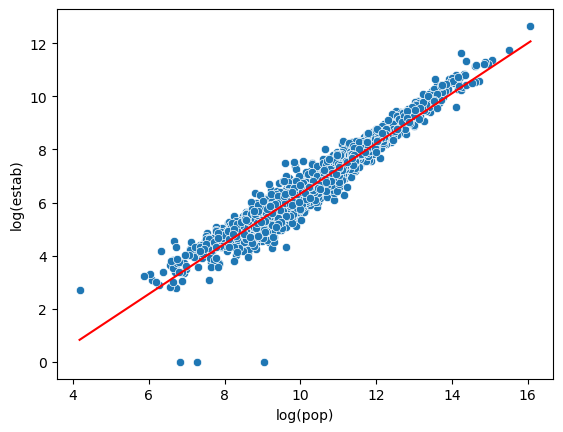

In [8]:
x = np.log(pop_estab.to_numpy())
y = np.log(estab.to_numpy() + 1)
years = np.empty((x.shape[1], 3))
for i in range(x.shape[1]):
    reg = LinearRegression().fit(x[:, i].reshape(-1, 1),y[:, i])
    years[i,0] = reg.score(x[:, i].reshape(-1, 1),y[:, i])
    years[i,1] = np.exp(reg.intercept_)
    years[i,2] = reg.coef_[0]

print(years[:,:3])

y = np.log(estab["2001"].to_numpy() + 1)
x = np.log(pop_estab["2000"].to_numpy())
fig = plt.figure()
ax = fig.gca()
sns.scatterplot(x=x,y=y, ax=ax)
x_1 = np.linspace(x.min(), x.max(), 1000)
y_1 = np.log(years[0,1]) + years[0,2]*x_1
plt.plot(x_1, y_1, "-r")
ax.set_xlabel("log(pop)")
ax.set_ylabel("log(estab)")
plt.show()

In [9]:

estab_SAMI = ((estab+1)/pop_estab.apply(f, axis=1, intercept=years[:,1], coef=years[:,2])).apply(np.log)
print(estab_SAMI.shape)
cond = ((estab_SAMI-estab_SAMI.mean(axis=0)).apply(np.abs) < 3*estab_SAMI.std(axis=0)).apply(np.all, axis=1)

estab = estab[cond]
pop_estab = pop_estab[cond]

x = np.log(pop_estab.to_numpy())
y = np.log(estab.to_numpy() + 1)

years = np.empty((x.shape[1], 3))
outliers = set()
for i in range(x.shape[1]):
    reg = LinearRegression().fit(x[:, i].reshape(-1, 1),y[:, i])
    years[i,0] = reg.score(x[:, i].reshape(-1, 1),y[:, i])
    years[i,1] = np.exp(reg.intercept_)
    years[i,2] = reg.coef_[0]

estab_SAMI = ((estab+1)/pop_estab.apply(f, axis=1, intercept=years[:,1], coef=years[:,2])).apply(np.log)
    
years[:,:3]

(3074, 20)


array([[0.94725241, 0.04333291, 0.94708709],
       [0.94594631, 0.04383438, 0.9460319 ],
       [0.9460793 , 0.04415371, 0.94579953],
       [0.94552189, 0.04411005, 0.94605367],
       [0.94567531, 0.04425657, 0.94604574],
       [0.94531004, 0.04421615, 0.94693647],
       [0.94531742, 0.04449183, 0.94725809],
       [0.94559055, 0.04646202, 0.94415452],
       [0.94489921, 0.04658147, 0.94379583],
       [0.94337806, 0.04853483, 0.93858898],
       [0.943196  , 0.04869503, 0.93736137],
       [0.94227084, 0.04947231, 0.93549275],
       [0.94133716, 0.05172162, 0.93174087],
       [0.94121008, 0.05267761, 0.9303259 ],
       [0.94125471, 0.0526805 , 0.93048291],
       [0.94175665, 0.05263139, 0.93116092],
       [0.94181605, 0.0521846 , 0.93251165],
       [0.94017438, 0.05129766, 0.93402765],
       [0.94083528, 0.05043491, 0.9361359 ],
       [0.94257591, 0.04915458, 0.93939914]])

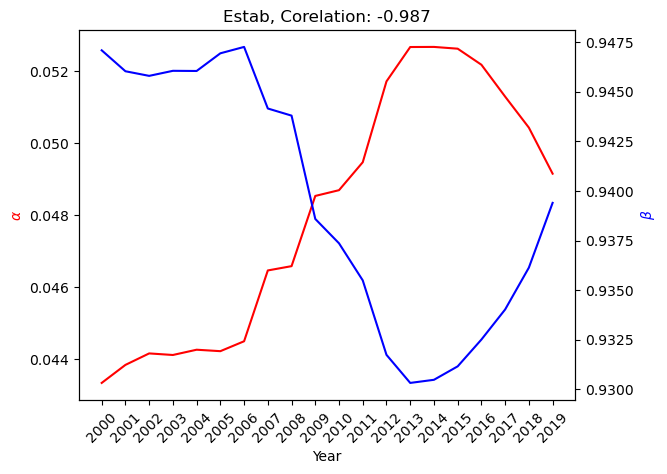

In [10]:
fig, ax = plt.subplots()
ax.plot(list(range(2000,2020)), years[:,1], "r")
ax.set_xlabel("Year")
ax.set_ylabel("$\\alpha$", color="red")
ax2 = ax.twinx()
ax2.plot(list(range(2000,2020)), years[:,2], "b")
ax2.set_ylabel("$\\beta$", color="blue")
corr = np.corrcoef(years[:,1], years[:,2])
ax.set_title(f"Estab, Corelation: {corr[0,1]:.3f}")
ax.set_xticks(list(range(2000,2020)))
ax.tick_params('x', labelrotation=45)
# fig.subplots_adjust(right=0.15)
plt.show()

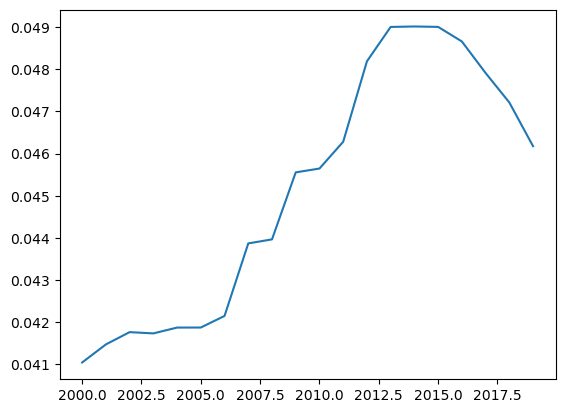

In [11]:
plt.plot(list(range(2000,2020)),years[:,1]*years[:,2])
plt.show()

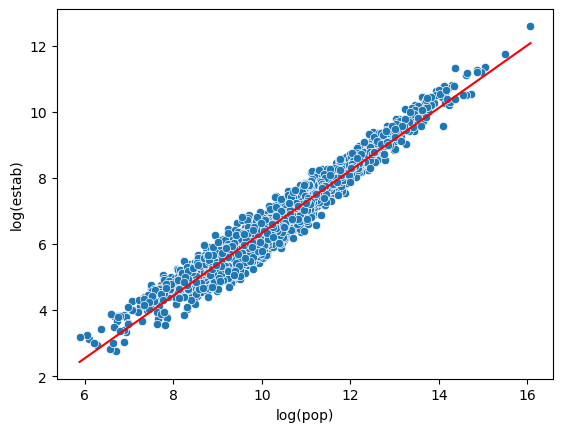

In [12]:
y = np.log(estab["2000"].to_numpy() + 1)
x = np.log(pop_estab["2000"].to_numpy())
fig = plt.figure()
ax = fig.gca()
sns.scatterplot(x=x,y=y, ax=ax)
x_1 = np.linspace(x.min(), x.max(), 1000)
y_1 = np.log(years[0,1]) + years[0,2]*x_1
plt.plot(x_1, y_1, "-r")
# ax.get_legend().remove()
ax.set_xlabel("log(pop)")
ax.set_ylabel("log(estab)")
plt.show()

In [13]:
estab_SAMI

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
45001,"Abbeville County, South Carolina",-0.557238,-0.599182,-0.573780,-0.615799,-0.554879,-0.513607,-0.475210,-0.569067,-0.592690,-0.577788,-0.582455,-0.595143,-0.613438,-0.582092,-0.602189,-0.599715,-0.651351,-0.619922,-0.588359,-0.587817
22001,"Acadia Parish, Louisiana",-0.160214,-0.189326,-0.239107,-0.251846,-0.252869,-0.255934,-0.244314,-0.233756,-0.206868,-0.169570,-0.155693,-0.155386,-0.159664,-0.162234,-0.196150,-0.195762,-0.195891,-0.185874,-0.175422,-0.166405
51001,"Accomack County, Virginia",-0.066012,-0.055731,-0.045097,-0.023372,-0.017645,0.013905,0.030117,0.092061,0.109302,0.104879,0.118729,0.105278,0.116728,0.120493,0.145777,0.243546,0.295060,0.311322,0.322278,0.289563
16001,"Ada County, Idaho",0.546544,0.569474,0.563763,0.579377,0.568095,0.564645,0.573391,0.571794,0.546853,0.529160,0.503982,0.472165,0.436652,0.427983,0.426298,0.417285,0.436952,0.465762,0.472562,0.428551
19001,"Adair County, Iowa",0.406281,0.384231,0.368784,0.374854,0.323635,0.214866,0.168978,0.136500,0.227931,0.208724,0.223563,0.210368,0.269029,0.287920,0.303098,0.340646,0.376328,0.367085,0.382725,0.408821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,"Yuma County, Arizona",-0.347483,-0.335899,-0.337837,-0.326730,-0.326389,-0.308829,-0.284290,-0.254203,-0.259985,-0.301788,-0.332669,-0.367218,-0.365099,-0.392190,-0.389684,-0.404122,-0.405151,-0.403169,-0.415789,-0.415444
8125,"Yuma County, Colorado",0.316084,0.291838,0.295356,0.292640,0.326963,0.338470,0.343459,0.407082,0.424288,0.377624,0.360530,0.364135,0.367410,0.378904,0.382346,0.397781,0.399358,0.430358,0.433701,0.417939
48505,"Zapata County, Texas",-0.570789,-0.586206,-0.588229,-0.578742,-0.550782,-0.536391,-0.537785,-0.522447,-0.571995,-0.556071,-0.585335,-0.587820,-0.613928,-0.655053,-0.636420,-0.654392,-0.716100,-0.721924,-0.761456,-0.763410


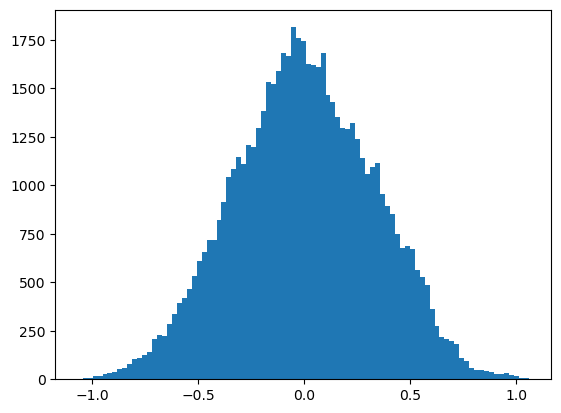

In [14]:
plt.hist(estab_SAMI.to_numpy().flatten(), bins="auto")
plt.show()

In [15]:
estab_SAMI.to_csv("../data/processed/SAMI/estab.csv")

## 2 EMP

In [16]:
emp = pd.read_csv("../data/processed/emp.csv", index_col=[0,1])
# emp.set_index("Geographic Area", inplace=True)
emp

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
1001,"Autauga County, Alabama",10770,11201,10838,11135,11209,11452,11259,11403,11273,11004,10694,10627,10137,10193,10458,10587,10739,10823,10974,11107
1003,"Baldwin County, Alabama",48952,48971,49686,51372,53451,56110,59291,62600,62612,58948,58140,59581,60440,62719,65024,67585,70107,71999,74051,76419
1005,"Barbour County, Alabama",11909,11629,11145,11237,10770,11132,11095,10711,10321,9462,9382,9044,8520,8425,8166,8202,7937,8012,8113,8239
1007,"Bibb County, Alabama",3867,3630,3722,3831,3951,4014,4092,4255,4231,4037,4030,4015,4130,4196,4240,4075,4144,4110,4215,4602
1009,"Blount County, Alabama",9137,9087,8428,8232,8138,8410,8572,9058,9095,8603,8291,8128,8203,8174,7960,8066,8147,8327,8535,8712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,"Sweetwater County, Wyoming",18710,18855,18571,19453,20439,21850,23889,24757,25610,23920,23668,24580,24877,24630,24269,23590,22340,22214,22275,22293
56039,"Teton County, Wyoming",16438,16736,16688,16546,16730,17251,17943,18445,18906,17415,16938,16946,17419,18107,18836,19497,20232,20784,20959,21429
56041,"Uinta County, Wyoming",7961,8373,8827,8695,8630,8860,9386,9714,10192,9576,9357,8985,9127,8850,8899,8720,8311,8175,8219,8292


In [17]:
cities = set.intersection(set(pop.index.values.tolist()), set([index[1] for index in emp.index.values]))
pop_emp = pop.drop(set(pop.index.values.tolist()).difference(cities))
emp = emp.loc[idx[:, list(cities)],]
emp = emp.sort_index(level=1)

In [18]:
pop_emp["Area Code"] = [index[0] for index in emp.index.values]
pop_emp = pop_emp.set_index("Area Code", append=True).reorder_levels(["Area Code", "Geographic Area"])

In [19]:
pop_emp.shape

(3074, 20)

In [20]:
x = np.log(pop_emp.to_numpy())
y = np.log(emp.to_numpy() + 1)
years = np.empty((x.shape[1], 3))
for i in range(x.shape[1]):
    reg = LinearRegression().fit(x[:, i].reshape(-1, 1),y[:, i])
    years[i,0] = reg.score(x[:, i].reshape(-1, 1),y[:, i])
    years[i,1] = np.exp(reg.intercept_)
    years[i,2] = reg.coef_[0]

years[:,:3]

array([[0.9571456 , 0.11788372, 1.10029971],
       [0.94244517, 0.11237052, 1.10358227],
       [0.95043285, 0.12353386, 1.09390468],
       [0.95005898, 0.1268635 , 1.09073671],
       [0.95682676, 0.1333477 , 1.08667281],
       [0.95743401, 0.13367349, 1.08714758],
       [0.95667435, 0.13821197, 1.08464738],
       [0.95554311, 0.14300553, 1.08155059],
       [0.95397725, 0.15088244, 1.07551913],
       [0.95385001, 0.15457948, 1.06879221],
       [0.94678089, 0.15244734, 1.06889961],
       [0.95235775, 0.15869435, 1.06577395],
       [0.94616269, 0.16005103, 1.06587512],
       [0.9396657 , 0.15074516, 1.07203251],
       [0.95154471, 0.16463553, 1.06493357],
       [0.9473646 , 0.15550751, 1.07083549],
       [0.95369722, 0.1552498 , 1.0713681 ],
       [0.95339078, 0.15395109, 1.07244301],
       [0.94746225, 0.15165629, 1.07435899],
       [0.95257995, 0.15675667, 1.07181088]])

In [21]:
emp_SAMI = ((emp+1)/pop_emp.apply(f, axis=1, intercept=years[:,1], coef=years[:,2])).apply(np.log)
print(emp_SAMI.shape)
cond = ((emp_SAMI-emp_SAMI.mean(axis=0)).apply(np.abs) < 3*emp_SAMI.std(axis=0)).apply(np.all, axis=1)

emp = emp[cond]
pop_emp = pop_emp[cond]

x = np.log(pop_emp.to_numpy())
y = np.log(emp.to_numpy() + 1)

years = np.empty((x.shape[1], 3))
outliers = set()
for i in range(x.shape[1]):
    reg = LinearRegression().fit(x[:, i].reshape(-1, 1),y[:, i])
    years[i,0] = reg.score(x[:, i].reshape(-1, 1),y[:, i])
    years[i,1] = np.exp(reg.intercept_)
    years[i,2] = reg.coef_[0]

emp_SAMI = ((emp+1)/pop_emp.apply(f, axis=1, intercept=years[:,1], coef=years[:,2])).apply(np.log)
    
years[:,:3]

(3074, 20)


array([[0.96349391, 0.10750032, 1.10916018],
       [0.96286235, 0.11105558, 1.10518887],
       [0.96343725, 0.11555942, 1.10055026],
       [0.96313775, 0.11857155, 1.09748115],
       [0.96311691, 0.12137416, 1.09572878],
       [0.96307303, 0.12360984, 1.09470218],
       [0.96264015, 0.12721225, 1.09259202],
       [0.96201134, 0.13041809, 1.09031054],
       [0.96069365, 0.13624014, 1.08519083],
       [0.96011261, 0.14094719, 1.07753927],
       [0.9596152 , 0.14252009, 1.07546634],
       [0.95886898, 0.14498306, 1.0743207 ],
       [0.95831644, 0.15008788, 1.07208689],
       [0.95852335, 0.14993732, 1.07285031],
       [0.95852265, 0.15026687, 1.07351225],
       [0.95941594, 0.14651263, 1.07658196],
       [0.96043427, 0.14215616, 1.07964755],
       [0.96053941, 0.14061636, 1.08094333],
       [0.96024967, 0.14101317, 1.08130196],
       [0.96025064, 0.14155865, 1.08134716]])

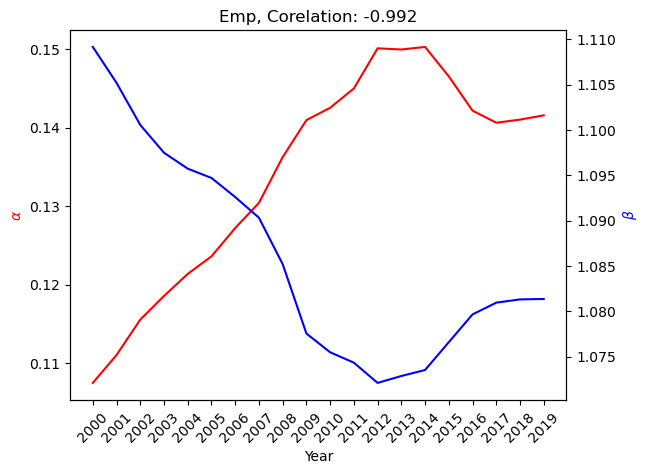

In [22]:
fig, ax = plt.subplots()
ax.plot(list(range(2000,2020)), years[:,1], "r")
ax.set_xlabel("Year")
ax.set_ylabel("$\\alpha$", color="red")
ax2 = ax.twinx()
ax2.plot(list(range(2000,2020)), years[:,2], "b")
ax2.set_ylabel("$\\beta$", color="blue")
corr = np.corrcoef(years[:,1], years[:,2])
ax.set_title(f"Emp, Corelation: {corr[0,1]:.3f}")
ax.set_xticks(list(range(2000,2020)))
ax.tick_params('x', labelrotation=45)
# fig.subplots_adjust(right=0.15)
plt.show()

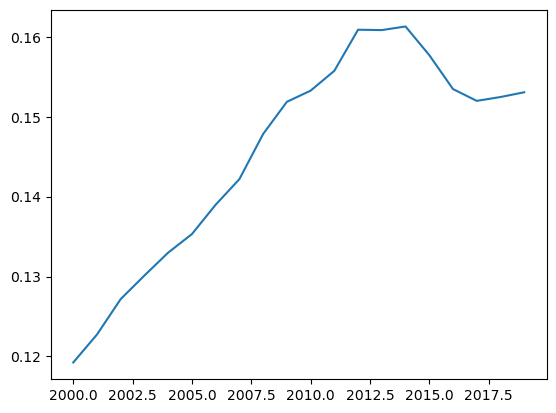

In [23]:
plt.plot(list(range(2000, 2020)), years[:,1]*years[:,2])
plt.show()

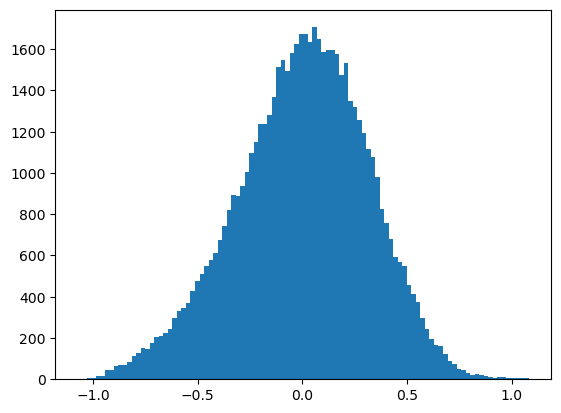

In [24]:
plt.hist(emp_SAMI.to_numpy().flatten(), bins="auto")
plt.show()

In [25]:
emp_SAMI.to_csv("../data/processed/SAMI/emp.csv")

## 3 WAGE

In [26]:
wage = pd.read_csv("../data/processed/wage.csv", index_col=[0,1])
# wage.set_index("Area", inplace=True)
wage

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
1001,"Autauga County, Alabama",271408036,286478713,285380385,294510040,308828358,315915858,327401659,344361798,348048304,343671502,339507223,344356024,341513497,346301954,357996403,372121908,390543141,403973438,421471042,448078198
1003,"Baldwin County, Alabama",1111836793,1148223606,1209948108,1285592072,1400815870,1556506413,1748925435,1884879602,1927158897,1812253901,1813332562,1867342552,1926968200,2039249324,2153975449,2289992521,2405999881,2542347527,2724884967,2926328541
1005,"Barbour County, Alabama",275633730,267565308,257944698,271424827,275830936,289723031,301528643,306949289,303686419,281049165,284020114,283642912,274141362,277034593,277686028,287488204,280568726,286429822,309995639,307946374
1007,"Bibb County, Alabama",83152374,83888801,91466831,96648423,105904285,110525400,117235805,128747697,131359697,126150880,133484343,135294733,143358732,150995538,158192555,153672464,162759631,163743155,168991784,197822899
1009,"Blount County, Alabama",206285117,210033098,203628173,202211626,208867976,222140321,239594436,255128353,264924573,251420597,241814378,241592968,249082568,253030002,261183071,268107138,275101272,288221287,303943040,312366933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,"Sweetwater County, Wyoming",640570058,673321739,675198022,730994240,795545714,919622330,1099886407,1200298499,1319500959,1178986872,1214886166,1332108127,1388778526,1385052659,1420422178,1375045314,1257096313,1288821054,1310772101,1343820804
56039,"Teton County, Wyoming",436479026,473327396,482382066,505541006,525839499,569170699,636146185,684328915,733895543,661596359,644274548,660999203,697931273,733030026,800102733,829214011,891064321,948609712,1009490180,1105111555
56041,"Uinta County, Wyoming",196570284,220340670,246357491,248923950,251762437,275144044,316462489,363925632,403522480,380602291,399313004,362048970,374570800,392531058,373787535,359204390,328088645,325816862,334312348,348474831


In [27]:
cities = set.intersection(set(pop.index.values.tolist()), set([index[1] for index in wage.index.values]))
pop_wage = pop.drop(set(pop.index.values.tolist()).difference(cities))
wage = wage.loc[idx[:, list(cities)], ]
wage = wage.sort_index(level=1)

In [28]:
pop_wage["Area Code"] = [index[0] for index in wage.index.values]
pop_wage = pop_wage.set_index("Area Code", append=True).reorder_levels(["Area Code", "Geographic Area"])
pop_wage.head()

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Geographic Area,,,,,,,,,,,,,,,,,,,,
45001,"Abbeville County, South Carolina",26229,26330.0,26311.0,26306.0,26235.0,25995.0,25821.0,25745.0,25699.0,25614.0,25328,25081,25019,24899,24795,24796,24657,24567,24587,24527
22001,"Acadia Parish, Louisiana",58795,58844.0,59065.0,59194.0,59223.0,59524.0,60522.0,60762.0,61115.0,61451.0,61877,61865,61997,62299,62667,62679,62786,62559,62214,62045
51001,"Accomack County, Virginia",38215,37742.0,37308.0,36742.0,36310.0,35835.0,35192.0,34553.0,33970.0,33415.0,33148,33225,33268,32969,32971,32914,32871,32685,32581,32316
16001,"Ada County, Idaho",303328,313896.0,321616.0,327393.0,334926.0,348755.0,363498.0,375368.0,382618.0,388577.0,393354,401262,408862,415951,425471,432862,444486,456548,468764,481587
19001,"Adair County, Iowa",8223,8132.0,8059.0,8050.0,8019.0,7932.0,7924.0,7871.0,7747.0,7676.0,7679,7546,7468,7387,7368,7145,7005,7051,7074,7152


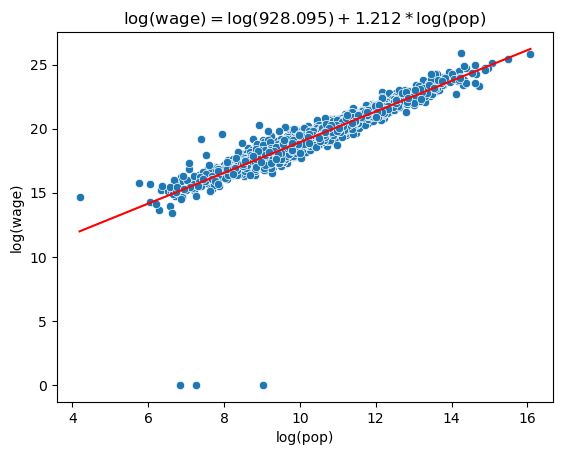

array([[9.44855943e-01, 1.06422350e+03, 1.19772872e+00],
       [8.73934903e-01, 9.28094694e+02, 1.21179022e+00],
       [9.15629329e-01, 1.18094960e+03, 1.19108971e+00],
       [9.14972714e-01, 1.26117508e+03, 1.18683105e+00],
       [9.44357494e-01, 1.42915733e+03, 1.17936460e+00],
       [9.45033636e-01, 1.50590532e+03, 1.17801366e+00],
       [9.42935165e-01, 1.66125900e+03, 1.17320498e+00],
       [9.40091827e-01, 1.84605097e+03, 1.16707905e+00],
       [9.36544426e-01, 2.13834522e+03, 1.15541924e+00],
       [9.37228445e-01, 2.23949635e+03, 1.14735234e+00],
       [9.05027689e-01, 2.24260616e+03, 1.14800530e+00],
       [9.31667411e-01, 2.55965388e+03, 1.13889869e+00],
       [9.00665487e-01, 2.62262588e+03, 1.13953857e+00],
       [8.60311024e-01, 2.28436323e+03, 1.15427818e+00],
       [9.26413321e-01, 3.09804468e+03, 1.13000399e+00],
       [9.01587840e-01, 2.84835709e+03, 1.14053057e+00],
       [9.32893116e-01, 2.94298861e+03, 1.13907379e+00],
       [9.32418118e-01, 3.00759

In [29]:
x = np.log(pop_wage.to_numpy())
y = np.log(wage.to_numpy() + 1)
years = np.empty((x.shape[1], 3))
for i in range(x.shape[1]):
    reg = LinearRegression().fit(x[:, i].reshape(-1, 1),y[:, i])
    years[i,0] = reg.score(x[:, i].reshape(-1, 1),y[:, i])
    years[i,1] = np.exp(reg.intercept_)
    years[i,2] = reg.coef_[0]

y = np.log(wage["2001"].to_numpy() + 1)
x = np.log(pop_wage["2001"].to_numpy())
fig = plt.figure()
ax = fig.gca()
sns.scatterplot(x=x,y=y, ax=ax)
x_1 = np.linspace(x.min(), x.max(), 1000)
y_1 = np.log(years[0,1]) + years[0,2]*x_1
plt.plot(x_1, y_1, "-r")
ax.set_xlabel("log(pop)")
ax.set_ylabel("log(wage)")
ax.set_title(f"$\\log(\\mathrm{{wage}})=\\log({years[1,1]:.3f}) + {years[1,2]:.3f}*\\log(\\mathrm{{pop}})$")
plt.show()

years[:,:3]

(3074, 20)


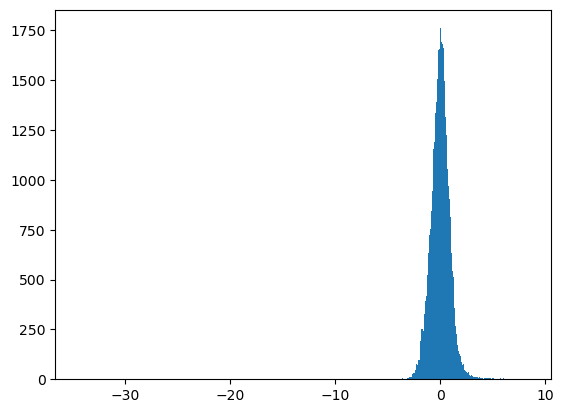

array([[9.54840745e-01, 9.06109292e+02, 1.21201931e+00],
       [9.54416303e-01, 9.79293117e+02, 1.20665812e+00],
       [9.55307335e-01, 1.06052408e+03, 1.20078107e+00],
       [9.54784312e-01, 1.12586035e+03, 1.19707718e+00],
       [9.54385336e-01, 1.20538416e+03, 1.19447251e+00],
       [9.54413936e-01, 1.27870337e+03, 1.19243096e+00],
       [9.53016133e-01, 1.40148118e+03, 1.18814175e+00],
       [9.51623887e-01, 1.53243863e+03, 1.18343021e+00],
       [9.48917858e-01, 1.75017508e+03, 1.17303877e+00],
       [9.48673960e-01, 1.86704813e+03, 1.16325558e+00],
       [9.47427204e-01, 1.95654064e+03, 1.15996312e+00],
       [9.44605533e-01, 2.10378289e+03, 1.15596656e+00],
       [9.42409158e-01, 2.28986713e+03, 1.15124785e+00],
       [9.41820675e-01, 2.39792981e+03, 1.14903519e+00],
       [9.40599308e-01, 2.53947189e+03, 1.14719200e+00],
       [9.42714016e-01, 2.52689571e+03, 1.15069090e+00],
       [9.45292990e-01, 2.47314381e+03, 1.15400879e+00],
       [9.45298468e-01, 2.51915

In [30]:
wage_SAMI = ((wage+1)/pop_wage.apply(f, axis=1, intercept=years[:,1], coef=years[:,2])).apply(np.log)
print(wage_SAMI.shape)
cond = ((wage_SAMI-wage_SAMI.mean(axis=0)).apply(np.abs) < 3*wage_SAMI.std(axis=0)).apply(np.all, axis=1)

plt.hist((wage_SAMI/wage_SAMI.std(axis=0)).to_numpy().flatten(), bins="auto")
plt.show()

wage = wage[cond]
pop_wage = pop_wage[cond]

x = np.log(pop_wage.to_numpy())
y = np.log(wage.to_numpy() + 1)

years = np.empty((x.shape[1], 3))
outliers = set()
for i in range(x.shape[1]):
    reg = LinearRegression().fit(x[:, i].reshape(-1, 1),y[:, i])
    years[i,0] = reg.score(x[:, i].reshape(-1, 1),y[:, i])
    years[i,1] = np.exp(reg.intercept_)
    years[i,2] = reg.coef_[0]

wage_SAMI = ((wage+1)/pop_wage.apply(f, axis=1, intercept=years[:,1], coef=years[:,2])).apply(np.log)
    
years[:,:3]

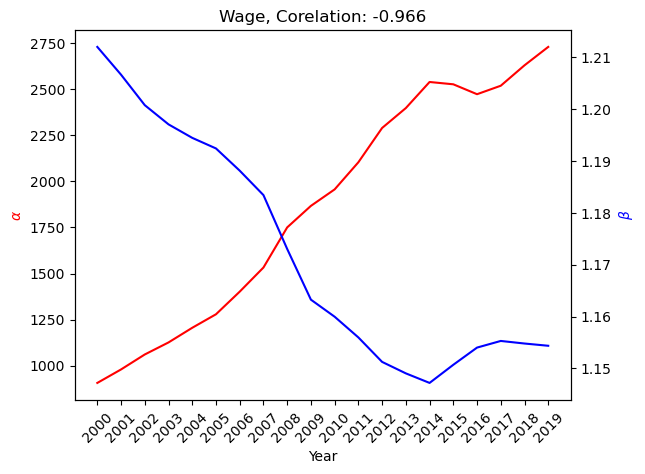

In [31]:
fig, ax = plt.subplots()
ax.plot(list(range(2000,2020)), years[:,1], "r")
ax.set_xlabel("Year")
ax.set_ylabel("$\\alpha$", color="red")
ax2 = ax.twinx()
ax2.plot(list(range(2000,2020)), years[:,2], "b")
ax2.set_ylabel("$\\beta$", color="blue")
corr = np.corrcoef(years[:,1], years[:,2])
ax.set_title(f"Wage, Corelation: {corr[0,1]:.3f}")
ax.set_xticks(list(range(2000,2020)))
ax.tick_params('x', labelrotation=45)
# fig.subplots_adjust(right=0.15)
plt.show()

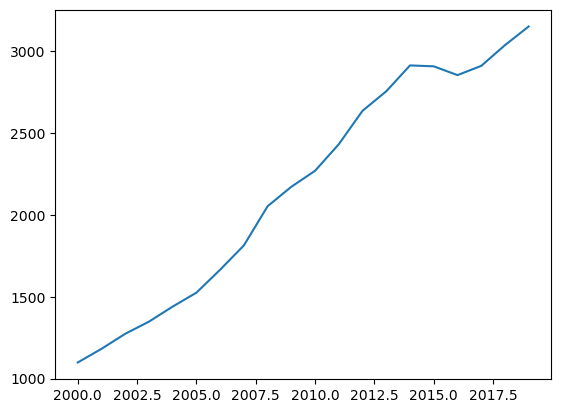

In [32]:
plt.plot(list(range(2000, 2020)), years[:,1]*years[:,2])
plt.show()

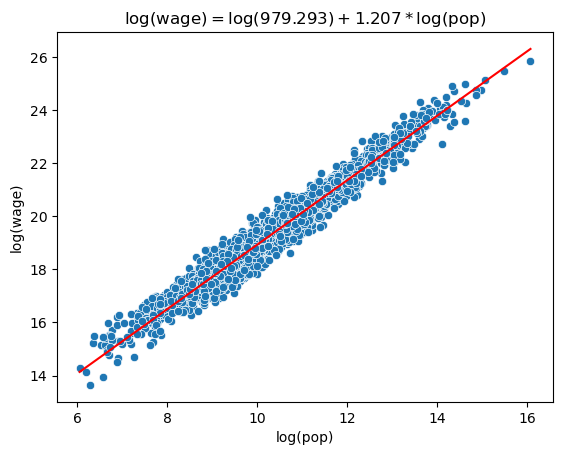

In [33]:
y = np.log(wage["2001"].to_numpy() + 1)
x = np.log(pop_wage["2001"].to_numpy())
fig = plt.figure()
ax = fig.gca()
sns.scatterplot(x=x,y=y, ax=ax)
x_1 = np.linspace(x.min(), x.max(), 1000)
y_1 = np.log(years[0,1]) + years[0,2]*x_1
plt.plot(x_1, y_1, "-r")
ax.set_xlabel("log(pop)")
ax.set_ylabel("log(wage)")
ax.set_title(f"$\\log(\\mathrm{{wage}})=\\log({years[1,1]:.3f}) + {years[1,2]:.3f}*\\log(\\mathrm{{pop}})$")
plt.show()

In [34]:
wage_SAMI

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
45001,"Abbeville County, South Carolina",-0.119807,-0.194714,-0.227459,-0.238910,-0.223747,-0.216323,-0.259332,-0.338685,-0.365629,-0.417969,-0.437213,-0.445869,-0.443207,-0.434165,-0.417030,-0.437522,-0.396762,-0.394375,-0.394515,-0.371278
22001,"Acadia Parish, Louisiana",-0.561827,-0.551714,-0.529427,-0.551270,-0.548300,-0.410653,-0.400187,-0.385068,-0.290257,-0.341056,-0.363982,-0.355913,-0.383524,-0.420167,-0.472931,-0.535389,-0.579541,-0.563442,-0.547134,-0.581359
51001,"Accomack County, Virginia",-0.124679,-0.065462,-0.019275,0.026730,0.037326,0.041416,0.026822,0.059376,0.088352,0.192199,0.188323,0.106132,0.117348,0.120848,0.116214,0.134181,0.150671,0.188807,0.208245,0.181963
16001,"Ada County, Idaho",0.427049,0.360883,0.338677,0.322610,0.338220,0.334743,0.364269,0.340396,0.292809,0.265061,0.260021,0.243009,0.230912,0.254481,0.259340,0.238882,0.245175,0.265087,0.282861,0.282760
19001,"Adair County, Iowa",0.306555,0.284222,0.317554,0.326808,0.302979,0.329558,0.297388,0.248759,0.269303,0.200605,0.224910,0.274902,0.273351,0.265755,0.291681,0.330227,0.399152,0.341431,0.336529,0.365830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,"Yuma County, Arizona",-0.492822,-0.431373,-0.388446,-0.347155,-0.308981,-0.286496,-0.290441,-0.279799,-0.285241,-0.281768,-0.305519,-0.336437,-0.329589,-0.338407,-0.349269,-0.352392,-0.350095,-0.338759,-0.334487,-0.338785
8125,"Yuma County, Colorado",0.150470,0.210381,0.232810,0.233843,0.243909,0.281168,0.342188,0.422370,0.461279,0.405798,0.351341,0.354916,0.344806,0.367173,0.372793,0.381287,0.326928,0.337140,0.394656,0.422852
48505,"Zapata County, Texas",-0.339930,-0.189842,-0.201955,-0.129085,-0.118146,-0.019045,0.092738,0.151238,0.107250,0.008006,0.187370,0.388062,0.547409,0.545322,0.546252,0.256757,-0.081267,0.055218,0.102459,0.078552


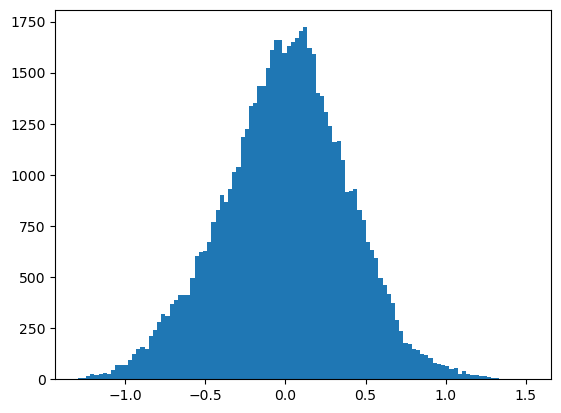

In [35]:
plt.hist(wage_SAMI.to_numpy().flatten(), bins="auto")
plt.show()

In [36]:
wage_SAMI.to_csv("../data/processed/SAMI/wage.csv")

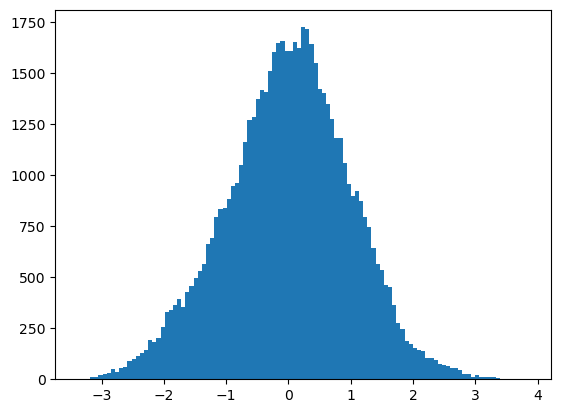

In [37]:
plt.hist((wage_SAMI/wage_SAMI.std(axis=0)).to_numpy().flatten(), bins="auto")
plt.show()

## Rescale all by standard deviation

In [38]:
for file in listdir("../data/processed/SAMI"):
    df = pd.read_csv(f"../data/processed/SAMI/{file}", index_col=[0,1])
    df = df/df.std(axis=0)
    df.to_csv(f"../data/processed/SAMI/{file}")